In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# настройка для отображение всех столбцов ДатаФрейма
pd.options.display.max_columns = None

# считываем наши файлы и создаем ДатаФреймы
lectures = pd.read_csv("lectures.csv")
questions = pd.read_csv("questions.csv")
train = pd.read_csv("train.csv", nrows=10**7*3) # ограничим размер датасета примерно до 30% от оригинального файла


#### Изучим базовую информацию наших датасетов через методы .head(), tail(), info(), describe() и свойство .shape

In [3]:
display(lectures.head())
display(lectures.tail())

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


,lecture_id,tag,part,type_of
413,32535,8,5,solving question
414,32570,113,3,solving question
415,32604,24,6,concept
416,32625,142,2,concept
417,32736,82,3,concept


In [6]:
display(questions.head())
display(questions.tail())

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


,question_id,bundle_id,correct_answer,part,tags
13518,13518,13518,3,5,14
13519,13519,13519,3,5,8
13520,13520,13520,2,5,73
13521,13521,13521,0,5,125
13522,13522,13522,3,5,55


In [8]:
display(train.head())
display(train.tail())

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
29999995,29999995,611488640,643006676,5974,0,160,3,1,7000.0,True
29999996,29999996,611530386,643006676,349,0,161,1,1,9000.0,True
29999997,29999997,611553434,643006676,1199,0,162,3,1,10000.0,True
29999998,29999998,611580001,643006676,886,0,163,3,1,16000.0,True
29999999,29999999,611600534,643006676,1162,0,164,0,1,19000.0,True


In [10]:
lectures.info(show_counts=True)
questions.info(show_counts=True)
train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000000 entries, 0 to 29999999
Data columns (total 10 columns):
 #   Column           

#### Оптимизируем потребление памяти датасетами и приведем типы данных в соответствие с условием задачи

In [13]:
lectures = lectures.astype({
    "lecture_id": "int16", 
    "tag": "int8", 
    "part": "int8"
})

questions = questions.astype({
    "question_id": "int16", 
    "bundle_id": "int16", 
    "correct_answer": "int8", 
    "part": "int8"
})

train = train.astype({
    "user_id": "int32", 
    "content_id": "int16", 
    "content_type_id": "int8", 
    "task_container_id": "int16",
    "answered_correctly": "int8", 
    "user_answer": "int8", 
    "prior_question_elapsed_time": "float32",
    'prior_question_had_explanation': 'bool'
})

# так же удаляем столбец row_id датасета train, который дублирует индексы
train.drop("row_id", axis=1, inplace=True)

In [15]:
display(lectures.describe())
display(questions.describe())
display(train.describe())

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,11.801435,4.267943
std,9426.164660,82.644199,1.872424
min,89.000000,-128.000000,1.000000
25%,9026.250000,-82.000000,2.000000
50%,17161.500000,36.000000,5.000000
75%,24906.250000,78.000000,6.000000
max,32736.000000,127.000000,7.000000


,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,3.000000e+07,3.000000e+07,3.000000e+07,3.000000e+07,3.000000e+07,3.000000e+07,3.000000e+07,2.930018e+07
mean,7.615870e+09,3.221336e+08,5.214853e+03,1.942707e-02,8.853191e+02,1.375739e+00,6.254436e-01,2.543454e+04
std,1.149242e+10,1.848949e+08,3.869381e+03,1.380205e-01,1.335557e+03,1.193183e+00,5.226070e-01,1.924189e+04
min,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,5.199794e+08,1.630735e+08,2.063000e+03,0.000000e+00,1.030000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,2.646730e+09,3.235100e+08,5.016000e+03,0.000000e+00,3.760000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,9.848912e+09,4.835727e+08,7.421000e+03,0.000000e+00,1.070000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,8.719336e+10,6.430067e+08,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


In [16]:
display(f"lectures table size - {lectures.shape}")
display(f"questions table size - {questions.shape}")
display(f"train table size - {train.shape}")

'lectures table size - (418, 4)'

'questions table size - (13523, 5)'

'train table size - (30000000, 9)'

##### Разберем более подробно датасет train.
##### Создадим и воспользуемся функцией подсчета пустых значений по столбцам

In [20]:
def get_missing_values(df):
    # Подсчет пропущенных значений по каждому столбцу
    missing_count = df.isnull().sum()
    
    # Подсчет процента пропущенных значений
    missing_percentage = round((missing_count / len(df)) * 100, 2)
    
    # Создание нового датафрейма
    missing_df = pd.DataFrame({
        "Имя столбца": missing_count.index,
        "Количество пропущенных строк": missing_count.values,
        "% пропущенных значений": missing_percentage.values
    })
    
    # Фильтрация только тех столбцов, где есть пропуски
    missing_df = missing_df[missing_df["Количество пропущенных строк"] > 0].reset_index(drop=True)

    return missing_df

display(get_missing_values(train))

,Имя столбца,Количество пропущенных строк,% пропущенных значений
0,prior_question_elapsed_time,699816,2.33


##### Поскольку пропущенные значения составляют маленький процент от общих данных и не несут важной информации, оставляем как есть

##### Далее проанализируем взаимосвязь между нашими признаками

##### Проверим соотношение событий в датасете

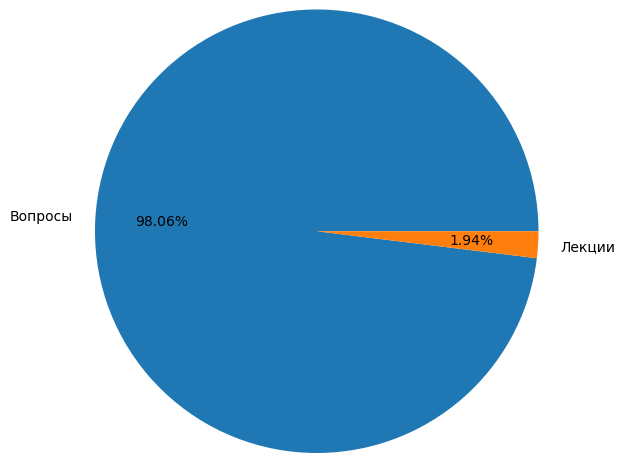

In [25]:
def pie(df, labels):

  fig, ax = plt.subplots()
  ax.pie(df, labels=labels, autopct="%1.2f%%", radius=1.5, pctdistance=0.7)

  plt.show()

pie(train["content_type_id"].value_counts(), ("Вопросы", "Лекции"))

##### Видим, что в соотношений количества вопросов и лекций, вопросы занимают подавляющее большинство
##### Далее логично проверить, как отвечали пользователи

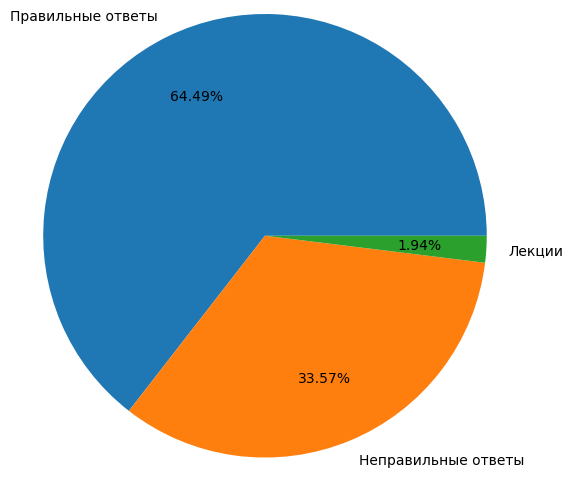

In [28]:
pie(train["answered_correctly"].value_counts(), ("Правильные ответы", "Неправильные ответы", "Лекции"))

##### Из граффика видно, что пользователи отвечали правильно почти в 65% случаев и неправильно в 33.5%
##### Попробуем выяснить, зависит ли количество правильных ответов от активности пользователей и ранее просмотренных лекций

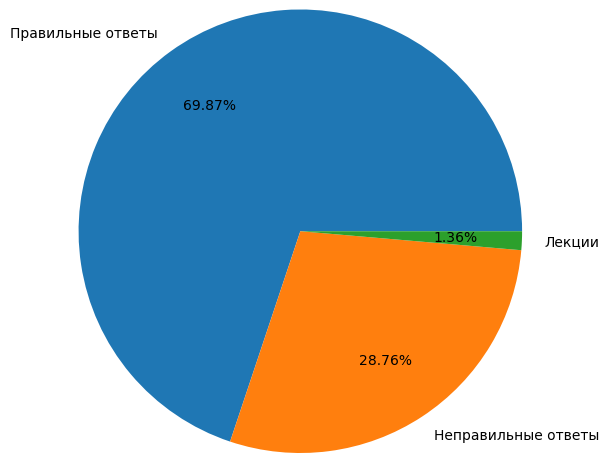

In [31]:
students_id_stat = train["user_id"].value_counts().reset_index()
top_20 = students_id_stat["user_id"].head(20)
top_20_df = train[train["user_id"].isin(top_20)]["answered_correctly"].value_counts()

pie(top_20_df, ("Правильные ответы", "Неправильные ответы", "Лекции"))

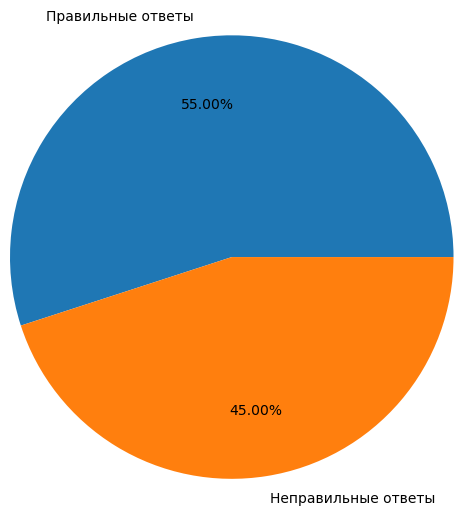

In [33]:
bottom_20 = students_id_stat["user_id"].tail(20)
bottom_20_df = train[train["user_id"].isin(bottom_20)]["answered_correctly"].value_counts()

pie(bottom_20_df, ("Правильные ответы", "Неправильные ответы"))

##### Из представленных графиков мы видим, что более активные студенты, смотревшие лекции, давали больше правильных ответов

### Теперь более подробно рассмотрим датасет questions

In [37]:
# приведем столбец tags к типу строка и проверим количество различных тегов
questions["tags"] = questions["tags"].astype(str)

tags = [s.split() for s in questions[questions["tags"] != "nan"]["tags"].values]
tags = [num for tag in tags for num in tag]
tags = list(set(tags))

display(f"всего {len(tags)} различных тегов")

'всего 188 различных тегов'

In [39]:
tags_lst = [num.split() for num in questions.tags.values]
questions["tags"] = tags_lst
questions.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,"[51, 131, 162, 38]"
1,1,1,1,1,"[131, 36, 81]"
2,2,2,0,1,"[131, 101, 162, 92]"
3,3,3,0,1,"[131, 149, 162, 29]"
4,4,4,3,1,"[131, 5, 162, 38]"


##### Согласно условию, признаки question_id и content_id датасетов questions и train связаны. 
##### Сгруппируем эти признаки и выясним количество правильных и неправильных ответов

In [42]:
answers = train[train["answered_correctly"] != -1].groupby(["content_id", "answered_correctly"], as_index=False).size() # отфильтруем -1 (лекции), добавим size для pivot
answers = answers.pivot(index= "content_id", columns="answered_correctly", values="size")
answers.columns = ["wrong", "correct"]
answers = answers.fillna(0)
answers[["wrong", "correct"]] = answers[["wrong", "correct"]].astype(int)
questions = questions.merge(answers, left_on = "question_id", right_on = "content_id", how = "left")
questions.head()

,question_id,bundle_id,correct_answer,part,tags,wrong,correct
0,0,0,0,1,"[51, 131, 162, 38]",196.0,1879.0
1,1,1,1,1,"[131, 36, 81]",235.0,2000.0
2,2,2,0,1,"[131, 101, 162, 92]",6000.0,7528.0
3,3,3,0,1,"[131, 149, 162, 29]",1549.0,5338.0
4,4,4,3,1,"[131, 5, 162, 38]",3597.0,5788.0


##### Так же можно определить соотношение правильных и неправильных ответов с каждым тегом

In [45]:
tags_df = pd.DataFrame()

for i in range(len(tags)):
    df = questions[questions.tags.apply(lambda l: tags[i] in l)]
    df_temp = df.agg({"wrong": ["sum"], "correct": ["sum"]})
    df_temp["questions_number"] = df_temp["wrong"] + df_temp["correct"]
    df_temp["tag"] = tags[i]
    df_temp = df_temp.set_index("tag")
    tags_df = pd.concat([tags_df, df_temp])

tags_df[["wrong", "correct", "questions_number"]] = tags_df[["wrong", "correct", "questions_number"]].astype("int32")
tags_df["percent_of_correct"] = tags_df["correct"] / tags_df["questions_number"]
tags_df = tags_df.sort_values(by = "percent_of_correct")

tags_df.head(10)

,wrong,correct,questions_number,percent_of_correct
tag,,,,
24,46525,29216,75741,0.385736
23,77373,60575,137948,0.439115
19,51163,40552,91715,0.442152
151,80899,77905,158804,0.490573
167,50196,50618,100814,0.502093
108,69199,70282,139481,0.503882
58,54569,55716,110285,0.505200
50,117563,120575,238138,0.506324
26,74886,78417,153303,0.511516


##### Построим график соотношения правильных ответов на 10 самых трудных и простых вопросов

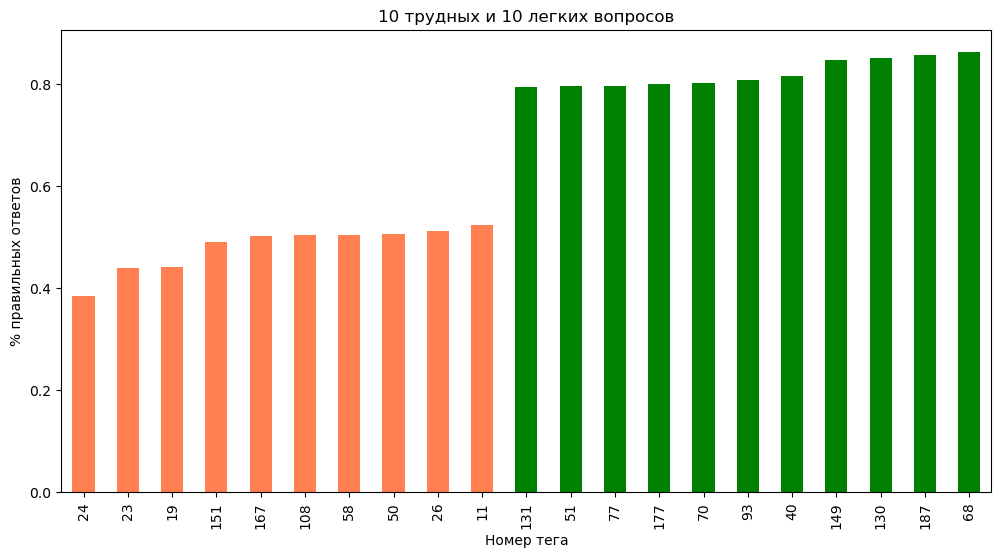

In [47]:
select_rows = list(range(0, 10)) + list(range(len(tags_df)-11, len(tags_df)))
tags_select = tags_df.iloc[select_rows, 3]

fig = plt.figure(figsize=(12,6))
x = tags_select.index
y = tags_select.values
clrs = ["coral" if y < 0.6 else "green" for y in tags_select.values]
tags_select.plot.bar(x, y, color=clrs)
plt.title("10 трудных и 10 легких вопросов")
plt.xlabel("Номер тега")
plt.ylabel("% правильных ответов")

plt.show()

##### Теперь подробнее рассмотрит датасет lectures

##### Признак task_container_id датасета train также включает в себя лекции, поэтому выясним, есть ли пакеты с большим количеством лекций

In [51]:
lect = train.groupby(["task_container_id", "answered_correctly"]).size().unstack()
lect.columns = ["lecture", "wrong", "correct"]
lect["lecture"] = lect["lecture"].fillna(0)
lect = lect.astype("int64")
lect["percent_correct"] = lect["correct"]/(lect["wrong"] + lect["correct"])
lect["percent_lecture"] = lect["lecture"]/(lect["lecture"] + lect["wrong"] + lect["correct"])
lect = lect.sort_values(by = "percent_lecture", ascending = False)

print(f"Самое большое количество просмотренных лекций в одном task_container_id - {lect["lecture"].max()}")

Самое большое количество просмотренных лекций в одном task_container_id - 1544


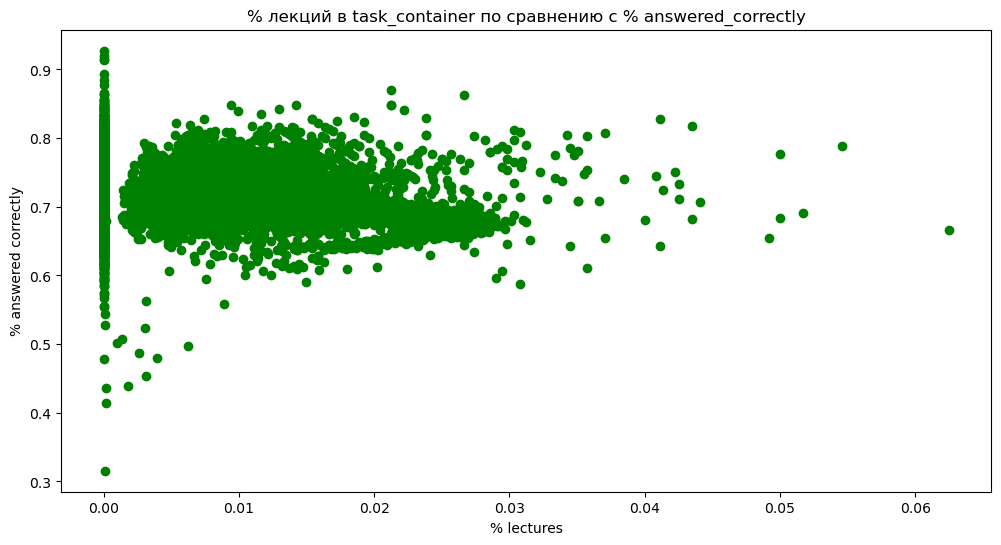

In [55]:
percents = lect.iloc[:, 3:]

fig = plt.figure(figsize=(12,6))
x = percents["percent_lecture"]
y = percents["percent_correct"] 
plt.scatter(x, y,  color="green")
plt.title("% лекций в task_container по сравнению с % answered_correctly")
plt.xticks(rotation=0)
plt.xlabel("% lectures")
plt.ylabel("% answered correctly")

plt.show()

##### Как мы видим, какой либо значительной корреляции между процентом лекций и правильными ответами нет